# Proyek Machine Learning: Prediksi Pertumbuhan Selada Dengan Algoritma Machine Learning

- **Nama:** Kevin Arnandes
- **Email:** kevinarnandes21@gmail.com
- **ID Dicoding:** kevinarnandes

## Import Semua Packages/Library yang Digunakan

In [2]:
"""Data Preparation Library"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
import numpy as np

"""Models Library"""
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

"""Model Evaluation"""
from sklearn.model_selection import cross_val_score

"""Other"""
import warnings
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category = ConvergenceWarning)

## Data Wrangling

### Gathering Data

In [3]:
# Load Dataset
url = "https://raw.githubusercontent.com/Vinzzztty/playground-data-analyst/main/Machine%20Learning%20Terapan/2.%20Sentiment%20Analysis/dataset/dataset_selada.csv"
df = pd.read_csv(url)

df.head(5)

,Jam,temperature,humidity,light,pH,EC,TDS,WaterTemp,Label,Pattern
0,15.15,25.5,67,17660,6.4,855,427,29.7,Selada,1
1,17.22,26.9,80,86930,6.7,929,464,27.0,Selada,1
2,7.33,25.7,77,23320,6.1,900,449,25.4,Selada,1
3,9.18,26.6,69,32280,6.7,887,443,26.1,Selada,1
4,10.39,25.8,65,41750,6.6,967,482,25.7,Selada,1


In [4]:
df.sample(5)

,Jam,temperature,humidity,light,pH,EC,TDS,WaterTemp,Label,Pattern
726,9.36,26.6,75,104000,6.8,1886,943,24.3,Selada,1
619,15.23,34.1,93,3369,6.9,900,450,28.0,Selada,1
3131,10.33,27.3,91,80350,6.8,1129,564,28.1,Selada,2
3098,9.47,23.6,59,56850,6.5,1119,559,25.1,Selada,2
3698,13.48,27.5,67,76640,7.0,2304,1152,26.5,Selada,3


In [24]:
# Melihat baris dari terakhir pada dataframe

df.tail()

,Jam,temperature,humidity,light,pH,EC,TDS,WaterTemp,Label,Pattern
5000,11.09,28.4,82,17310,6.5,2798,1399,28.8,Selada,3
5001,12.11,24.3,52,17610,6.7,2792,1396,25.2,Selada,3
5002,13.16,31.2,80,2031,6.5,2956,1478,24.8,Selada,3
5003,14.09,24.2,99,111300,6.1,2946,1473,26.0,Selada,3
5004,15.15,27.8,83,21850,6.6,3044,1522,22.9,Selada,3


### Assessing Data

#### Melihat semua kolom pada dataframe

In [5]:
# Show Column in dataframe
df.columns

Index(['Jam', 'temperature', 'humidity', 'light', 'pH', 'EC', 'TDS',
       'WaterTemp', 'Label', 'Pattern'],
      dtype='object')

#### Melihat tipe data dari dataframe

In [6]:
# Cek tipe data dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jam          5005 non-null   float64
 1   temperature  5005 non-null   float64
 2   humidity     5005 non-null   int64  
 3   light        5005 non-null   int64  
 4   pH           5005 non-null   float64
 5   EC           5005 non-null   int64  
 6   TDS          5005 non-null   int64  
 7   WaterTemp    5005 non-null   float64
 8   Label        5005 non-null   object 
 9   Pattern      5005 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 391.1+ KB


Dari output terlihat bahwa:
- Terdapat 1 kolom tipe object yaitu Label
- Terdapat 4 kolom numerik dengan tipe data float64 yaitu: Jam, temperature, pH, WaterTemp
- Terdapat 5 kolom numerik edngan tipe data int64 yaitu: humidity, light, EC, TDS, Pattern

In [7]:
# Cek nilai numerik
df.describe()

,Jam,temperature,humidity,light,pH,EC,TDS,WaterTemp,Pattern
count,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000
mean,12.351025,28.935584,76.700699,34558.569431,6.520300,1675.379421,837.839560,26.296803,2.008791
std,38.150216,75.274318,22.948338,49156.295229,0.262504,728.307725,364.706067,2.368517,0.832927
min,7.180000,21.800000,0.000000,560.000000,5.700000,336.000000,161.000000,3.600000,1.000000
25%,9.320000,24.800000,62.000000,8300.000000,6.400000,1143.000000,571.000000,24.500000,1.000000
50%,11.320000,26.300000,83.000000,18840.000000,6.500000,1587.000000,793.000000,26.100000,2.000000
75%,13.420000,28.000000,99.000000,39420.000000,6.700000,2248.000000,1124.000000,27.500000,3.000000
max,1358.000000,2619.000000,99.000000,702000.000000,7.100000,3178.000000,1934.000000,34.200000,3.000000


#### Cek Missing Value dan data kosong

In [8]:
# Check null data
df.isnull().sum()

Jam            0
temperature    0
humidity       0
light          0
pH             0
EC             0
TDS            0
WaterTemp      0
Label          0
Pattern        0
dtype: int64

In [192]:
# Check NaN data
df.isna().sum()

Jam            0
temperature    0
humidity       0
light          0
pH             0
EC             0
TDS            0
WaterTemp      0
Label          0
Pattern        0
dtype: int64

#### Assessing Specific Column seperti kolom Label, Pattern, dan Temperature

In [10]:
# Cek nilai unik pada kolom Label
df['Label'].value_counts()

Label
Selada    5005
Name: count, dtype: int64

In [11]:
# Melihat nilai unik pada kolom Pattern
df['Pattern'].value_counts()

Pattern
3    1758
1    1714
2    1533
Name: count, dtype: int64

##### Melihat nilai pada kolom temperature yang lebih besar dari 100

In [193]:
# Filter baris dengan nilai 'temperature' lebih besar dari 100
high_temperature_rows = df[df['temperature'] > 100]

# Tampilkan nilai pada kolom 'temperature' dari baris yang telah difilter
high_temperature_values = high_temperature_rows['temperature']
print("Nilai kolom 'temperature' yang lebih besar dari 100:")
print(high_temperature_values)

Nilai kolom 'temperature' yang lebih besar dari 100:
1873    2619.0
2143    2619.0
2349    1239.0
2419    2619.0
3209    2619.0
Name: temperature, dtype: float64


## Exploratory Data Analysis (EDA)

### Melihat Banyak Nilai pada Kolom Pattern

In [198]:
# Hitung jumlah setiap nilai dalam kolom 'Pattern'
pattern_counts = df['Pattern'].value_counts()

print(pattern_counts)

Pattern
3    1758
1    1714
2    1533
Name: count, dtype: int64


### Mencari Korelasi Kolom

In [197]:
# Membuat Matrix Korelasi
cor_matrix = df[['temperature', 'humidity', 'light', 'pH', 'EC', 'TDS','WaterTemp','Pattern']].corr()
cor_matrix

,temperature,humidity,light,pH,EC,TDS,WaterTemp,Pattern
temperature,1.000000,-0.105658,0.059090,-0.003839,-0.006678,-0.006485,0.162393,0.000317
humidity,-0.105658,1.000000,-0.070975,0.016518,0.045092,0.044673,-0.101836,-0.049649
light,0.059090,-0.070975,1.000000,-0.027438,0.013735,0.012359,0.083195,0.004200
pH,-0.003839,0.016518,-0.027438,1.000000,-0.063254,-0.065248,-0.023790,-0.065984
EC,-0.006678,0.045092,0.013735,-0.063254,1.000000,0.995993,-0.023934,0.571283
TDS,-0.006485,0.044673,0.012359,-0.065248,0.995993,1.000000,-0.021312,0.569847
WaterTemp,0.162393,-0.101836,0.083195,-0.023790,-0.023934,-0.021312,1.000000,0.003337
Pattern,0.000317,-0.049649,0.004200,-0.065984,0.571283,0.569847,0.003337,1.000000


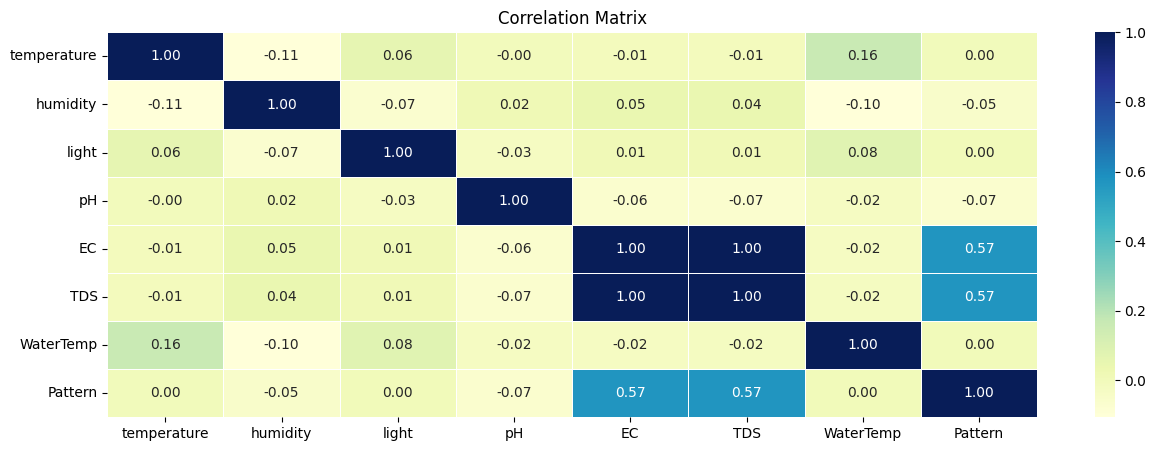

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(15, 5))
sns.heatmap(cor_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

EC dan TDS memiliki korelasi yang sangat baik yaitu Positif 1

## Data Preparation

### Cleaning Data

#### Menangani Kesalahan Penulisan Nilai pada Kolom temperature

In [ ]:
# Jika ada baris dengan nilai 'temperature' lebih dari 100.00, lakukan perbaikan
if not high_temperature_rows.empty:
    # Perbaiki nilai 'temperature' dengan membaginya dengan 100
    df.loc[df['temperature'] > 100.00, 'temperature'] /= 100.0

In [ ]:
# Cek dataframe apakah nilai temperature sudah benar dengan melihat min dan max
df.describe()

,Jam,temperature,humidity,light,pH,EC,TDS,WaterTemp,Pattern
count,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000
mean,12.351025,26.618332,76.700699,34558.569431,6.520300,1675.379421,837.839560,26.296803,2.008791
std,38.150216,2.416377,22.948338,49156.295229,0.262504,728.307725,364.706067,2.368517,0.832927
min,7.180000,12.390000,0.000000,560.000000,5.700000,336.000000,161.000000,3.600000,1.000000
25%,9.320000,24.800000,62.000000,8300.000000,6.400000,1143.000000,571.000000,24.500000,1.000000
50%,11.320000,26.300000,83.000000,18840.000000,6.500000,1587.000000,793.000000,26.100000,2.000000
75%,13.420000,28.000000,99.000000,39420.000000,6.700000,2248.000000,1124.000000,27.500000,3.000000
max,1358.000000,37.800000,99.000000,702000.000000,7.100000,3178.000000,1934.000000,34.200000,3.000000


#### Handling Outliers

##### Visualisasi Boxplot

<Axes: xlabel='temperature'>

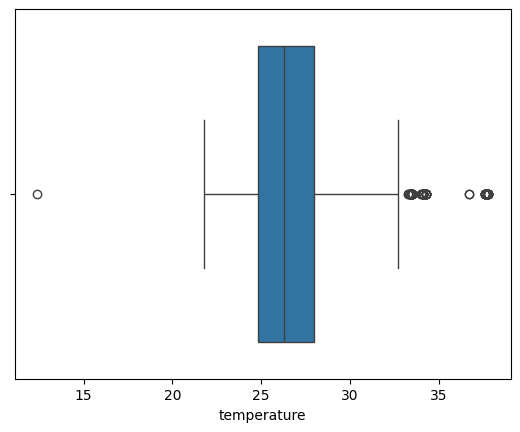

In [ ]:
sns.boxplot(x=df['temperature'])

<Axes: xlabel='humidity'>

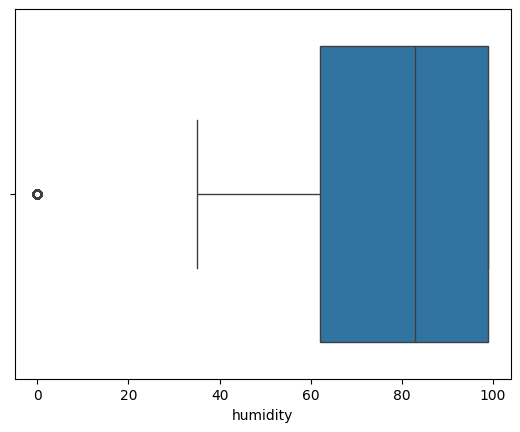

In [ ]:
sns.boxplot(x=df['humidity'])

<Axes: xlabel='light'>

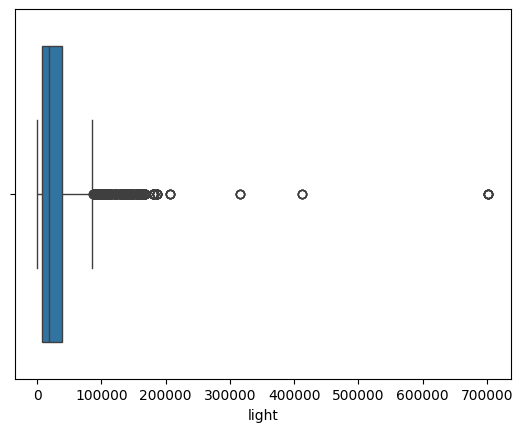

In [ ]:
sns.boxplot(x=df['light'])

<Axes: xlabel='pH'>

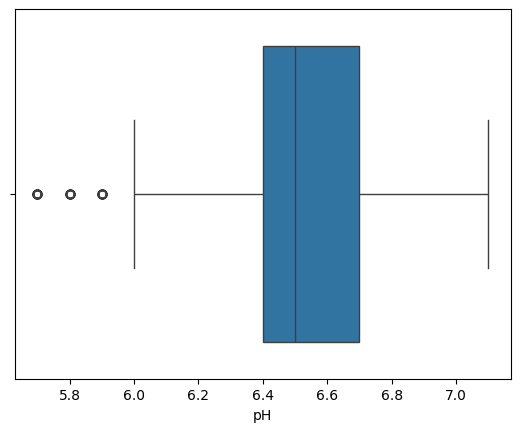

In [ ]:
sns.boxplot(x=df['pH'])

<Axes: xlabel='EC'>

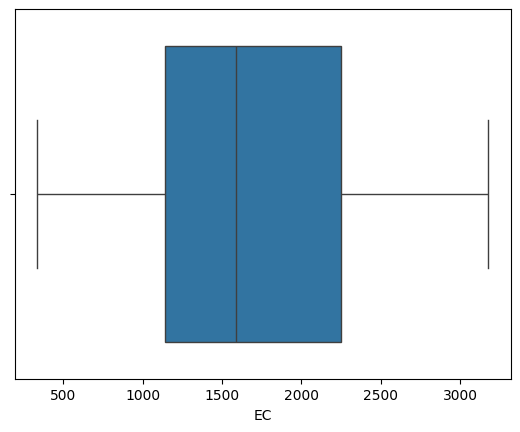

In [ ]:
sns.boxplot(x=df['EC'])

<Axes: xlabel='TDS'>

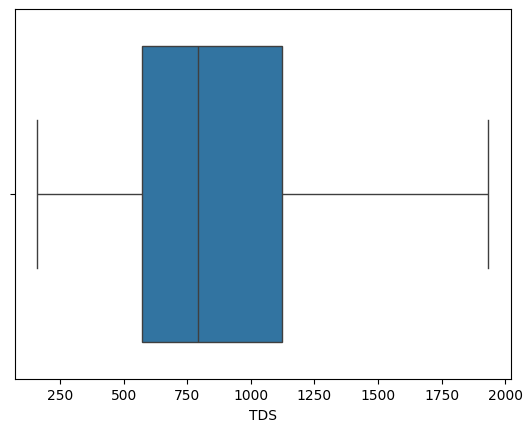

In [ ]:
sns.boxplot(x=df['TDS'])

<Axes: xlabel='WaterTemp'>

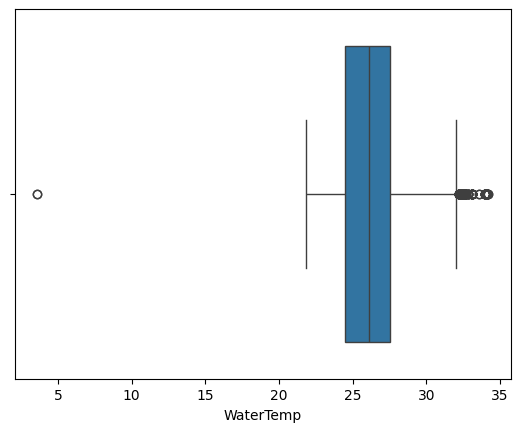

In [ ]:
sns.boxplot(x=df['WaterTemp'])

##### Menangani Outlier dengan IQR

In [ ]:
# Tentukan kolom yang akan dipertimbangkan
kolom_yang_dipertimbangkan = ['temperature', 'humidity', 'light', 'pH', 'EC', 'TDS', 'WaterTemp']

# Hitung IQR untuk kolom-kolom yang sudah ditentukan
Q1 = df[kolom_yang_dipertimbangkan].quantile(0.25)
Q3 = df[kolom_yang_dipertimbangkan].quantile(0.75)
IQR = Q3 - Q1

# Filter outlier untuk kolom-kolom yang sudah ditentukan
insurance = df[~((df[kolom_yang_dipertimbangkan] < (Q1 - 1.5 * IQR)) | (df[kolom_yang_dipertimbangkan] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Periksa ukuran dataset setelah menghapus outlier
insurance.shape

(4057, 10)

#### Drop Not Important Column

In [ ]:
df = df.drop(columns=['Jam', 'Label'])

df.head()

,temperature,humidity,light,pH,EC,TDS,WaterTemp,Pattern
0,25.5,67,17660,6.4,855,427,29.7,1
1,26.9,80,86930,6.7,929,464,27.0,1
2,25.7,77,23320,6.1,900,449,25.4,1
3,26.6,69,32280,6.7,887,443,26.1,1
4,25.8,65,41750,6.6,967,482,25.7,1


### Data PreProcessing

In [15]:
# Membuat fitur-fitur yang akan digunakan
fitur = ['temperature', 'humidity', 'light', 'pH', 'EC', 'TDS', 'WaterTemp']

# Mengganti nilai-nilai dalam DataFrame
X = df[fitur]

# Variabel Target
y = df['Pattern']

In [16]:
# Display first 5 rows
X.head()

,temperature,humidity,light,pH,EC,TDS,WaterTemp
0,25.5,67,17660,6.4,855,427,29.7
1,26.9,80,86930,6.7,929,464,27.0
2,25.7,77,23320,6.1,900,449,25.4
3,26.6,69,32280,6.7,887,443,26.1
4,25.8,65,41750,6.6,967,482,25.7


#### Split Data to Train and Test 80:20

In [17]:
# Memisahkan data menjadi data latih dan data uji dengan perbandingan 80% dan 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Menampilkan jumlah total sampel dalam dataset keseluruhan
print(f'Total # of sample in whole dataset: {len(X)}')

# Menampilkan jumlah total sampel dalam dataset latih
print(f'Total # of sample in train dataset: {len(X_train)}')

# Menampilkan jumlah total sampel dalam dataset uji
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5005
Total # of sample in train dataset: 4004
Total # of sample in test dataset: 1001


### Standarisasi
Mengubah setiap fitur dalam data sehingga memiliki mean 0 dan standar deviasi 1.

In [19]:
# Memeriksa kolom-kolom non-numeric
kolom_non_numerik = X.select_dtypes(exclude=['float64', 'int64']).columns
print("Kolom non-numeric:", kolom_non_numerik)

Kolom non-numeric: Index([], dtype='object')


In [37]:
# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Deployment

Dengan Default Parameter

### Deklarasi variabel Models

In [162]:
# Train Models
models = {
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

#### Membuat variabel list untuk menyimpan hasil train models

In [163]:
# Create an empty list to store results
results_list = []

#### Melakukan training klasifikasi model

In [164]:
# Classification Model Reports
for name, model in models.items():
    # Assuming models is a dictionary containing your classifier instances
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    # Extract precision, recall, and f1-score
    precision = report_dict['weighted avg']['precision']
    recall = report_dict['weighted avg']['recall']
    f1_score = report_dict['weighted avg']['f1-score']

    # Append results to list
    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    })

#### Membuat dataframe baru bernama results_train_df yang berisi nilai dari list results_list

In [165]:
# Convert list of dictionaries to DataFrame
results_train_df = pd.DataFrame(results_list)

## Model Evaluation

### Display Akurasi masing masing model

In [166]:
results_train_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Gradient Boosting Classifier,0.922078,0.924836,0.922078,0.922765
1,Random Forest,0.904096,0.906997,0.904096,0.904894
2,Support Vector Machine,0.568432,0.661333,0.568432,0.480887
3,K-Nearest Neighbors,0.792208,0.801343,0.792208,0.794079


#### Visualisasi hasil train model yang disimpan di variabel results_train_df menggunakan library matplotlib

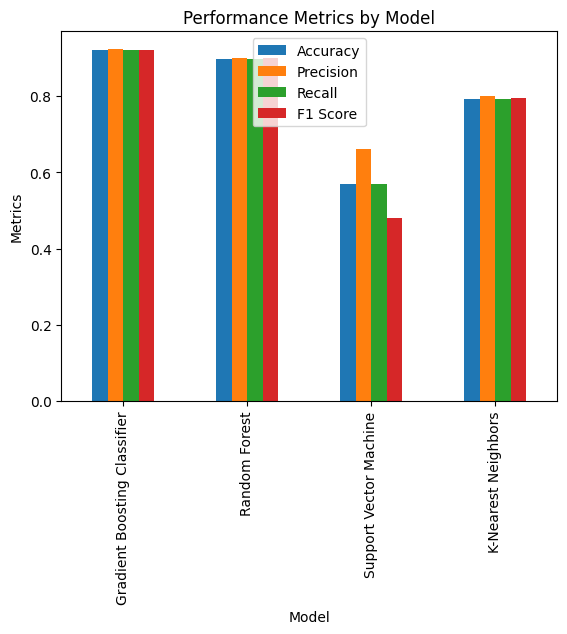

In [129]:
# Set 'Model' column as index
results_train_df.set_index('Model', inplace=True)

# Plot the DataFrame
results_train_df.plot(kind='bar')

# Set plot labels and title
plt.xlabel('Model')
plt.ylabel('Metrics')
plt.title('Performance Metrics by Model')

# Show the plot
plt.show()

### Menambahkan Hyperparameter masing masing model

#### Membuat variabel list baru bernama new_results_list untuk menyimpan hasil train model dengan hyperparameter tunning

In [182]:
new_results_list = []

#### Deklrasi model dengan hyperparameter tunning

In [121]:
new_models = {
    "Gradient Boosting Classifier": GradientBoostingClassifier(learning_rate=0.1,max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=30),
    "Support Vector Machine": SVC(C=10.0, kernel='rbf', gamma='scale'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
}

#### Melakukan train model hyperparameter tunning

In [183]:
# Classification Model Reports
for name, model in new_models.items():
    # Assuming models is a dictionary containing your classifier instances
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    # Extract precision, recall, and f1-score
    precision = report_dict['weighted avg']['precision']
    recall = report_dict['weighted avg']['recall']
    f1_score = report_dict['weighted avg']['f1-score']

    # Append results to list
    new_results_list.append({
        'New Model': name,
        'New Accuracy': accuracy,
        'New Precision': precision,
        'New Recall': recall,
        'New F1 Score': f1_score
    })

#### Convert hasil train model hyperparameter tunning ke dalam dataframe baru new_results_train_df

In [184]:
# Convert list of dictionaries to DataFrame
new_results_train_df= pd.DataFrame(new_results_list)

#### Melihat hasil dataframe new_results_train_df

In [185]:
# Display dataframe 
new_results_train_df

,New Model,New Accuracy,New Precision,New Recall,New F1 Score
0,Gradient Boosting Classifier,0.930070,0.930211,0.930070,0.930123
1,Random Forest,0.905095,0.907479,0.905095,0.905786
2,Support Vector Machine,0.602398,0.636580,0.602398,0.607443
3,K-Nearest Neighbors,0.858142,0.861380,0.858142,0.859058


### Visualisasi Perbandingan Model

Model sebelum di hyperparameter tunning dengan model hyperparameter tunning

#### Menggabungkan dataframe sebelum tunning dan sesudah tunning

In [188]:

combined_df = pd.concat([results_train_df, new_results_train_df], axis=1)

#### Drop not important column

In [189]:
# Drop not important column
combined_df.drop(columns=['New Model', 'Precision', 'Recall', 'F1 Score', 'New Precision', 'New Recall', 'New F1 Score'], inplace=True)

combined_df

,Model,Accuracy,New Accuracy
0,Gradient Boosting Classifier,0.922078,0.930070
1,Random Forest,0.904096,0.905095
2,Support Vector Machine,0.568432,0.602398
3,K-Nearest Neighbors,0.792208,0.858142


#### Membuat visualisasi perbandingan Model dengan parameternya adalah akurasi

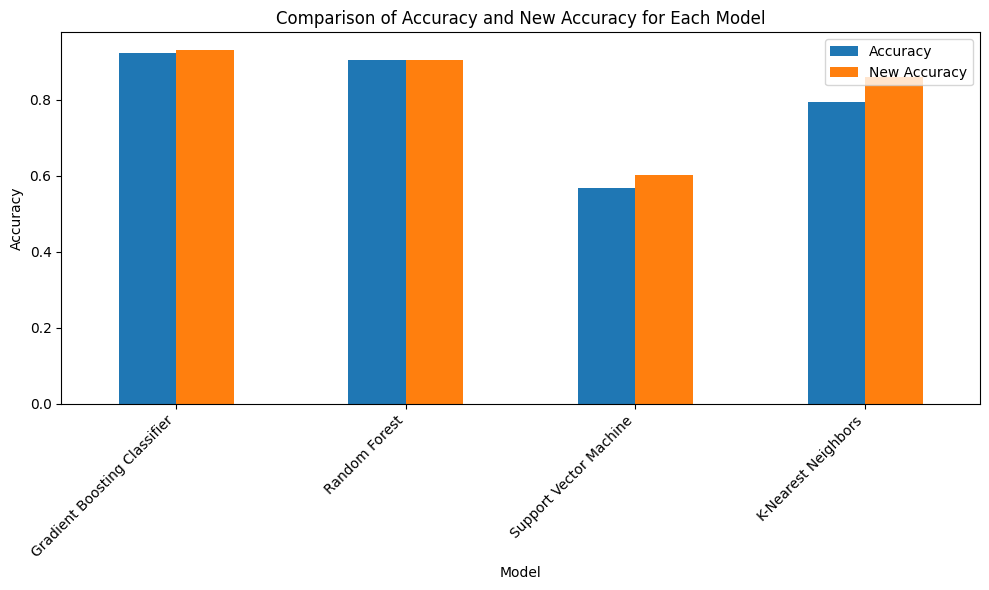

In [190]:
# Set 'Model' column as index
combined_df.set_index('Model', inplace=True)

# Plot the DataFrame
combined_df.plot(kind='bar', figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy and New Accuracy for Each Model')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()